### Small Image Classification using Simple Artificial Neural Network : GPU Benchmarking

In [1]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np



In [2]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU'),
 PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]

In [3]:
tf.__version__

'2.4.1'

In [4]:
tf.test.is_built_with_cuda()

True

## Load the dataset

In [5]:
(X_train, y_train), (X_test,y_test) = tf.keras.datasets.cifar10.load_data()

In [6]:
X_train.shape

(50000, 32, 32, 3)

In [7]:
y_train.shape

(50000, 1)

### Data Visualization

In [8]:
def plot_sample(index):
    plt.figure(figsize = (10,5))
    plt.imshow(X_train[index])

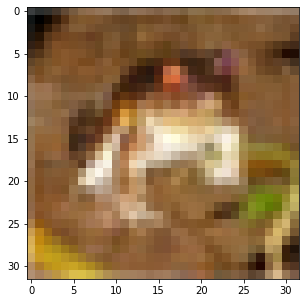

In [9]:
plot_sample(0)

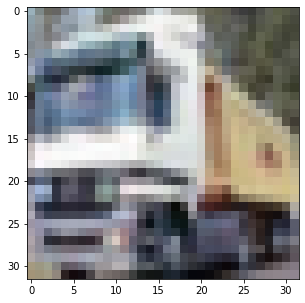

In [10]:
plot_sample(1)

In [11]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [12]:
classes[y_train[3][0]]

'deer'

In [13]:
y_test.shape

(10000, 1)

In [14]:
y_train[3][0]

4

### Preprocesssing Scale images

In [15]:
X_train_scaled = X_train / 255
X_test_scaled = X_test / 255

In [16]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes = 10, dtype = 'float32')

y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes = 10, dtype = 'float32')

In [17]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [18]:
y_train_categorical[0:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

### Model building and training

In [19]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape = (32,32,3)),
        keras.layers.Dense(3000, activation = 'relu'),
        keras.layers.Dense(1000, activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid')
])

model.compile(optimizer = "SGD",
             loss = 'categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(X_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 10s 5ms/step - loss: 1.9345 - accuracy: 0.3047


### Let's make some predictions

In [20]:
np.argmax(model.predict(X_test_scaled)[0])

3

In [21]:
y_test[0]

array([3], dtype=uint8)

In [22]:
def get_model():
    model = keras.Sequential([
        keras.layers.Flatten(input_shape = (32,32,3)),
        keras.layers.Dense(3000, activation = 'relu'),
        keras.layers.Dense(1000, activation = 'relu'),
        keras.layers.Dense(10, activation = 'sigmoid')
    ])
    
    model.compile(optimizer = 'SGD',
                 loss = 'categorical_crossentropy',
                 metrics = ['accuracy'])
    
    return model

### Measure training time on a CPU

In [23]:
%%timeit -n1 -r1

with tf.device('/CPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs = 1)

1563/1563 [==============================] - 69s 44ms/step - loss: 1.9363 - accuracy: 0.3049
1min 11s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


### Lets measure training time on a GPU (I've NVIDIA Titan RTX)


In [24]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=1)

1563/1563 [==============================] - 9s 5ms/step - loss: 1.9272 - accuracy: 0.3101
9.19 s ± 0 ns per loop (mean ± std. dev. of 1 run, 1 loop each)


In [25]:
%%timeit -n1 -r1 
with tf.device('/GPU:0'):
    cpu_model = get_model()
    cpu_model.fit(X_train_scaled, y_train_categorical, epochs=10)

Epoch 1/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.9224 - accuracy: 0.3105
Epoch 2/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.6384 - accuracy: 0.4196
Epoch 3/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.5497 - accuracy: 0.4540
Epoch 4/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4888 - accuracy: 0.4728
Epoch 5/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.4386 - accuracy: 0.4963
Epoch 6/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.3870 - accuracy: 0.5113
Epoch 7/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3556 - accuracy: 0.5230
Epoch 8/10
1563/1563 [==============================] - 8s 5ms/step - loss: 1.3176 - accuracy: 0.5398
Epoch 9/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.2836 - accuracy: 0.5525
Epoch 10/10
1563/1563 [==============================] - 9s 5ms/step - loss: 1.252